Objective: Help the marketing department for them to launch new products and sales based on the segmentation

Using data collected through loyalty cards at checkout

Segmentation helps marketers to be more efficient in terms of time, money and other resources

They gain a better understanding of customer's needs and wants and therefore can tailor campaigns to customer segments most likely to purchase products



In [61]:
#import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #styling
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [62]:
df=pd.read_csv('segmentation data.csv')

In [63]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [64]:
df= pd.read_csv('segmentation data.csv', index_col = 0)
#changing the index of our dataset to column index 0, or "ID"

In [65]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [66]:
#basic data exploration
df.describe()

#Understanding the columns and their values
#sex is 0 for male 1 for female
#marital status is 0 for not married, 1 for married
#Education 1, 2, ... for level of education achieved (0 is unkown, 1 is HS, 2 uni, 3 grad)
#occupation is 0 for unemployed, 1 for skilled, 2 for management
#settlement size is size of city customer lives in (0 for small city, 1 mid-sized, 2 big city)

#.describe() can give us an overview understanding of our population
#sex has a mean of 0.457, which means for men
#average age of 35
#average education achieved is HS
#high average and median income over six figures

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [67]:
df.info()
#object types are all integers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


In [68]:
df.isna().sum()
#no null values
#can also see with .info()
#general habit of double checking with .isna().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

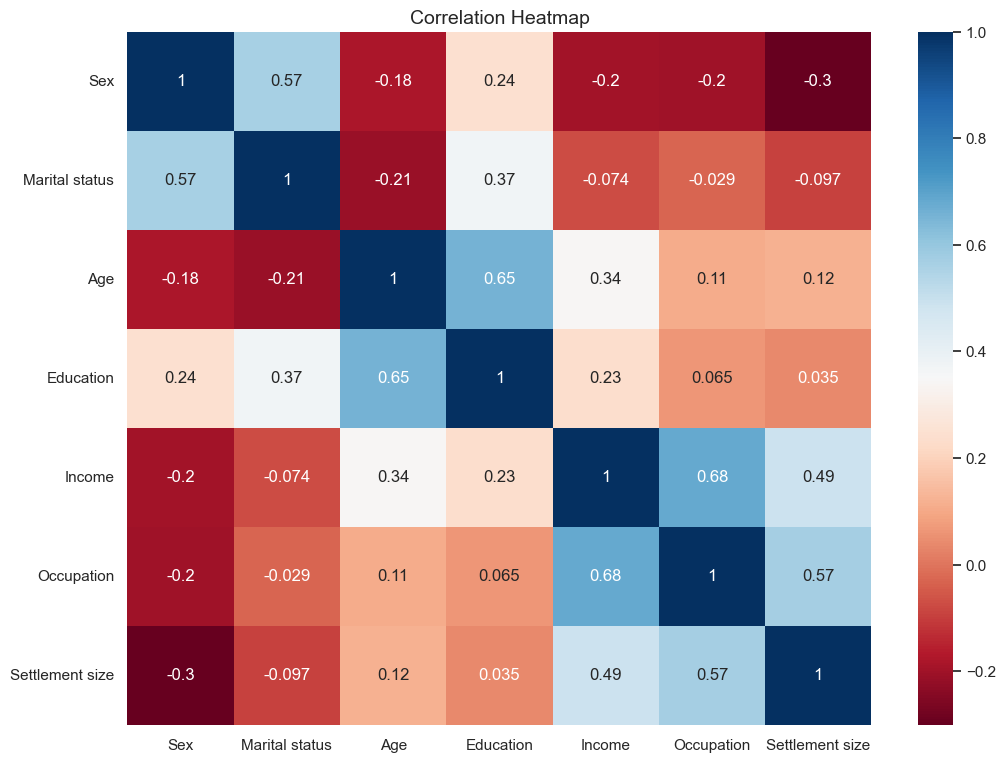

In [69]:
#initial data exploration with correlation
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

#what kind of correlations do we see?
#key positive correlations
#marital status and sex, age and education, income and occupation, occupation and settlement size
#key understandings/assumptions we can get
#the older you are the higher your education, the higher your income the higher level your occupation
#the higher level your occupation, the larger the settlement size? With more income means you can afford to live in a larger city

In [70]:
#Data Preprocessing, standardization
#we want to treat all the features equally in analysis
#we do this by trnasforming features so that their values fall within the same numerical range (0 to 1)

In [71]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [72]:
#start building segmentation model in K-means
df_std = pd.DataFrame(data = df_std,columns = df.columns)
#copy original datadrame for analysis and for changes

In [73]:
df_std.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


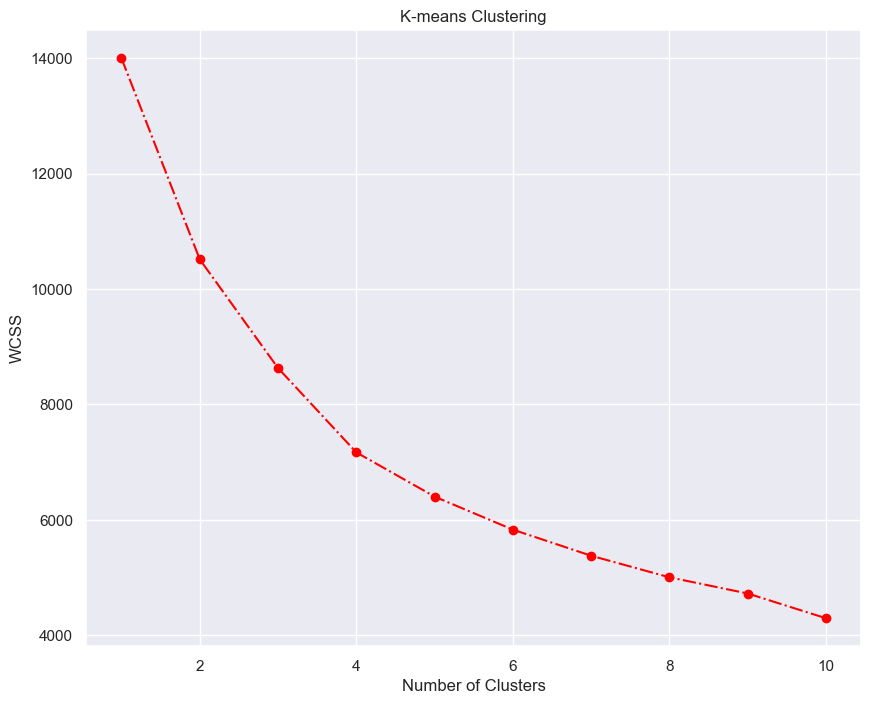

In [74]:
#for k-means, we need to figure out what number of clusters we want to use 
#we will do this with Within Clusters Sum of Squares (WCSS) and Elbow Method
wcss = []
for i in range(1,11): #number of clusters we want to evaluate
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    #Initializes a K-means clustering algorithm with the specified number of clusters (i). The 'k-means++' option is used for initializing the centroids in a smart way to speed up convergence, and random_state = 42 sets a fixed random seed for reproducibility.
    kmeans_pca.fit(df_std)
    #Fits the K-means algorithm to the data points (scores_pca), where scores_pca represents the transformed data points after applying Principal Component Analysis (PCA) or any other dimensionality reduction technique
    wcss.append(kmeans_pca.inertia_)

plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()
#basically we will look for the elbow point of the graph to identify the number of clusters we will use
#use 4 clusters

In [75]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(df_std)
#divide data into four clusters

KMeans(n_clusters=4, random_state=42)

In [76]:
#copy new dataframe with original features
#add new column segment k-means to identify which cluster each entry belongs to
df_segm_kmeans= df_std.copy()
df_segm_kmeans = pd.DataFrame(data = df_std,columns = df.columns)
df_segm_kmeans['Segment K-means'] = kmeans.labels_


In [77]:
df_segm_kmeans1= df_std.copy()
df_segm_kmeans1 = pd.DataFrame(data = df,columns = df.columns)
df_segm_kmeans1['Segment K-means'] = kmeans.labels_

In [78]:
df_segm_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,0
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,2
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,1
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,3
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,3


In [79]:
df_segm_analysis1 = df_segm_kmeans1.groupby(['Segment K-means']).mean()
df_segm_analysis1.head()
#understanding each segment of the kmeans

#segment 1: average age 56, completed college, 158k avg income, employed, mid-sized city
#segment 2: avg age 35, either completed hs or missing edu, lowest income, closer to unemployed, small town
#segment 3: avg age 29, completed college, 105k avg income, between employed and unemployed, small city
#segment 4: avg age 35, either completed hs or missing edu, 141k avg income, employed, mid to big city

#let's name the segments based on what we've observed

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [80]:
# df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
# df_segm_analysis.head()
#averages of each k-means cluster using .groupby()

In [81]:
#renaming clusters based on segments
#segment 1: avg age 
df_segm_analysis1.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'standard',
                         3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
career focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [82]:
df_segm_kmeans1['Labels'] = df_segm_kmeans1['Segment K-means'].map({0:'well-off', 
                                                                  1:'fewer opportunities',
                                                                  2:'standard', 
                                                                  3:'career focused'})

/Users/ethanw/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


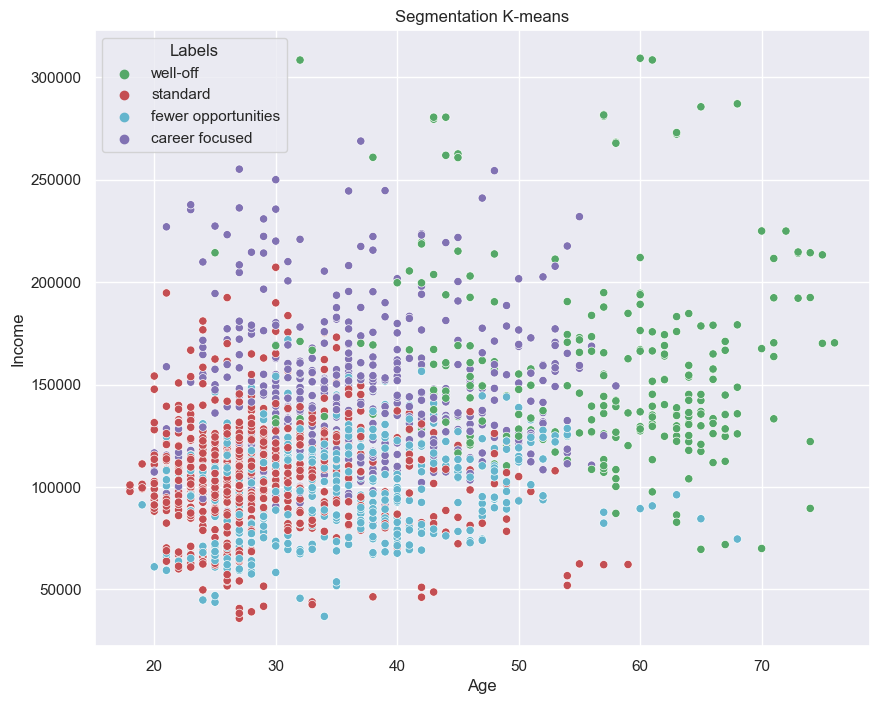

In [83]:
x_axis = df_segm_kmeans1['Age']
y_axis = df_segm_kmeans1['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans1['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()
#visualization of our kmeans clusters
#while standard, fewer opportunies, and career focused segments are clustered ogether
#well-off is separated, mostly because it has the larger range of age and income

#still the kmeans is difficult to separate segments from one another

PCA with K-Means

In [84]:
#PCA with K-Means for Better Visualization
#what we're doing is applying dimensionality reduction to simplify the problem
#basically we want to see a clear plot of our segmented groups

pca = PCA()
pca.fit(df_std)

PCA()

In [85]:
pca.explained_variance_ratio_
#what this tells us
#component 1 explains 32% of variability, etc etc

array([0.31670682, 0.27749602, 0.18635691, 0.07264964, 0.05009459,
       0.0448685 , 0.03460207, 0.01722544])

ValueError: x and y must have same first dimension, but have shapes (7,) and (8,)

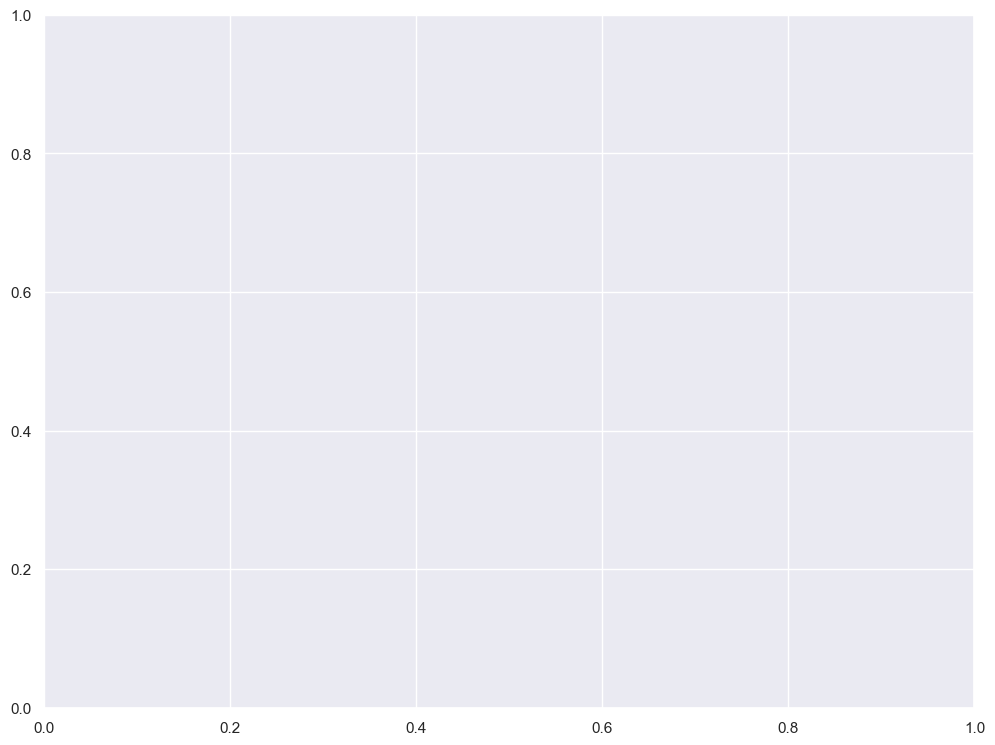

In [86]:
plt.figure(figsize = (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '-.',color='red')
plt.title('Explained Variance by Components',fontsize=16)
plt.xlabel('Number of Components',fontsize=14)
plt.ylabel('Cumulative Explained Variance',fontsize=14)